# Introduction

Content
1. Linear Regression
2. Multiple Linear Regression
3. Polynomial Linear Regression
4. Decision Tree Regression
5. Random Forest Regression


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv


# > Linear Regression
 
y=b1*x+b0 

b1=constant(bias) 

b0=coefficient[](http://)

A feature (x) is required for linear regression so I used pelvic_incidence column for this regression. And target is sacral slope column.

Text(0, 0.5, 'sacral slope')

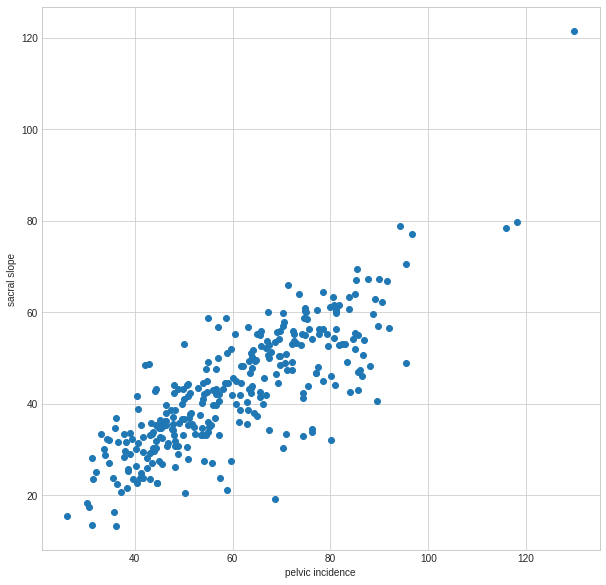

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv("input/column_2C_weka.csv")
plt.figure(figsize=[10,10])
plt.scatter(df.pelvic_incidence,df.sacral_slope)
plt.xlabel("pelvic incidence")
plt.ylabel("sacral slope")


In [3]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
x=df.pelvic_incidence.values.reshape(-1,1)
y=df.sacral_slope.values.reshape(-1,1)
linear_reg.fit(x,y)
y_head=linear_reg.predict(x)

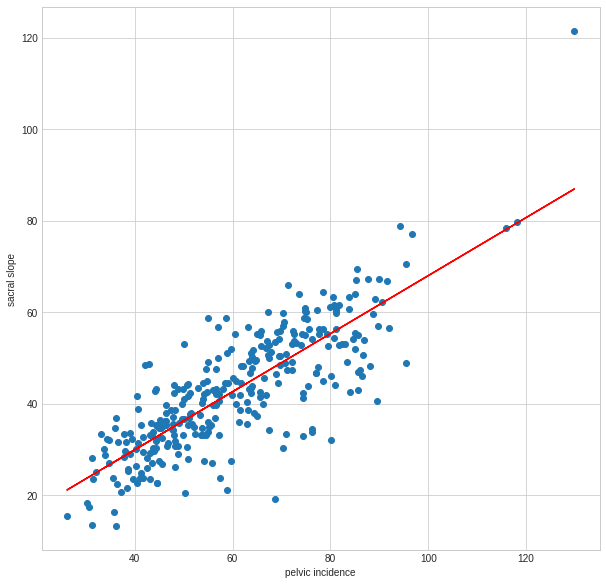

In [4]:
#%% # Plot regression line and scatter
plt.figure(figsize=[10,10])
plt.scatter(x,y)
plt.xlabel("pelvic incidence")
plt.ylabel("sacral slope")
plt.plot(x,y_head,color="red")
plt.show()

In [5]:
#%% prediction
b0=linear_reg.predict([[0]])
b1=linear_reg.coef_
print("b0: ",b0)
print("b1: ",b1)
#pelvic incidence = 80 sacral slope=?
print("Predict: ",b1*80+b0)

b0:  [[4.55916137]]
b1:  [[0.63465775]]
Predict:  [[55.33178132]]


In [6]:
#%% R^2 score
from sklearn.metrics import r2_score
print("R^2 : ",r2_score(y,y_head))


R^2 :  0.664159783972475


# > Multiple Linear Regression

y=b0+b1*x1+b2*x2+...+bn*xn
Multiple linear regression is similar to linear regression. Multiple linear regression required more than one features.
I used all dataset's feature.

In [7]:

from sklearn.linear_model import LinearRegression

x=df.iloc[:,[1,2,3,4,5]].values
y=df.pelvic_incidence.values.reshape(-1,1)

multiple_reg=LinearRegression()
multiple_reg.fit(x,y)
print("b0: ",multiple_reg.intercept_) # or print("b0: ",multiple_reg.predict(0))
print("b1,b2,b3,b4,b5 : ", multiple_reg.coef_)

b0:  [-4.42319958e-10]
b1,b2,b3,b4,b5 :  [[ 1.00000000e+00  1.88670214e-11  1.00000000e+00  6.21933163e-12
  -5.31246084e-12]]


In [8]:
y_head=multiple_reg.predict(x)
#%% R^2 score
from sklearn.metrics import r2_score
print("R^2 : ",r2_score(y,y_head))

R^2 :  1.0


R^2 score different way to show R^2 score

In [9]:
#%% R^2 score
print("R^2 :",multiple_reg.score(x,y))

R^2 : 1.0


# > Polynomial Linear Regression

y=b0+b1*x+b2*x^2+...+bn*x^n

In [10]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 4)
x_polynomial = polynomial_regression.fit_transform(x)

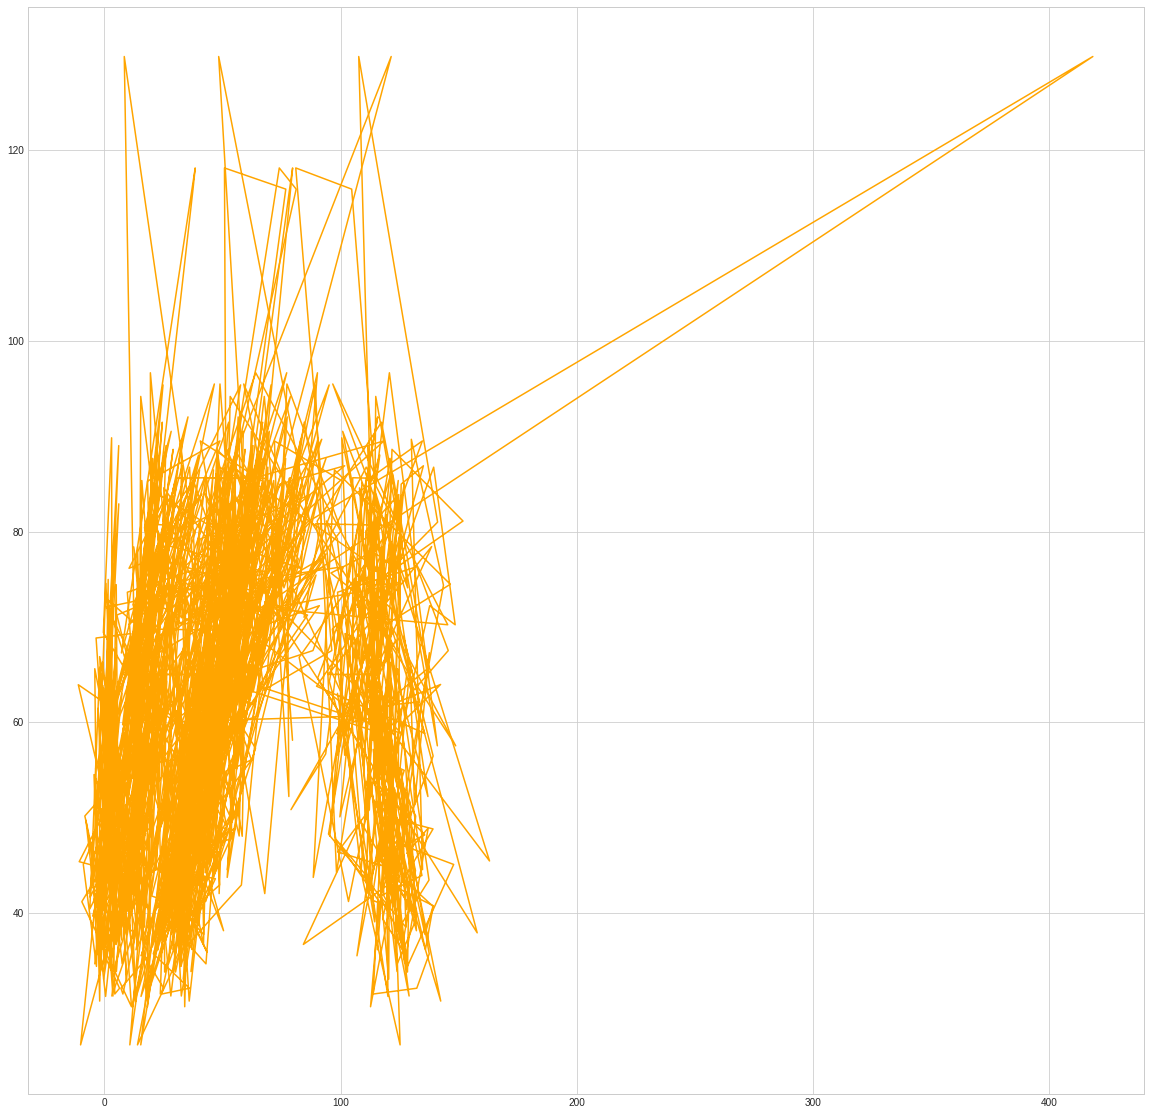

In [11]:
from sklearn.linear_model import LinearRegression
plt.figure(figsize=[20,20])
poly_reg=LinearRegression()
poly_reg.fit(x_polynomial,y)
y_head=poly_reg.predict(x_polynomial)
plt.plot(x,y_head,color="orange")
plt.show()

In [12]:
#%% R^2 score
from sklearn.metrics import r2_score
print("R^2 : ",r2_score(y,y_head))

R^2 :  0.9999999999999983


# > Decision Tree Regression

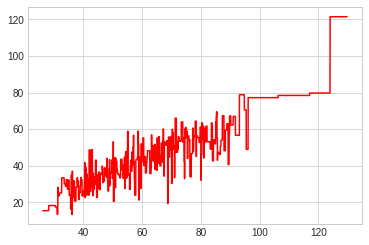

In [13]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
x=df.pelvic_incidence.values.reshape(-1,1)
y=df.sacral_slope.values.reshape(-1,1)
tree=DecisionTreeRegressor()
tree.fit(x,y)

x_=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head=tree.predict(x_)
plt.plot(x_,y_head,color="red")
plt.show()

# > Random Forest Regression

Using more than one machine language algorithm in one algorithm -->Ensemble Learning

Random forest is a mamber of ensemble learning.

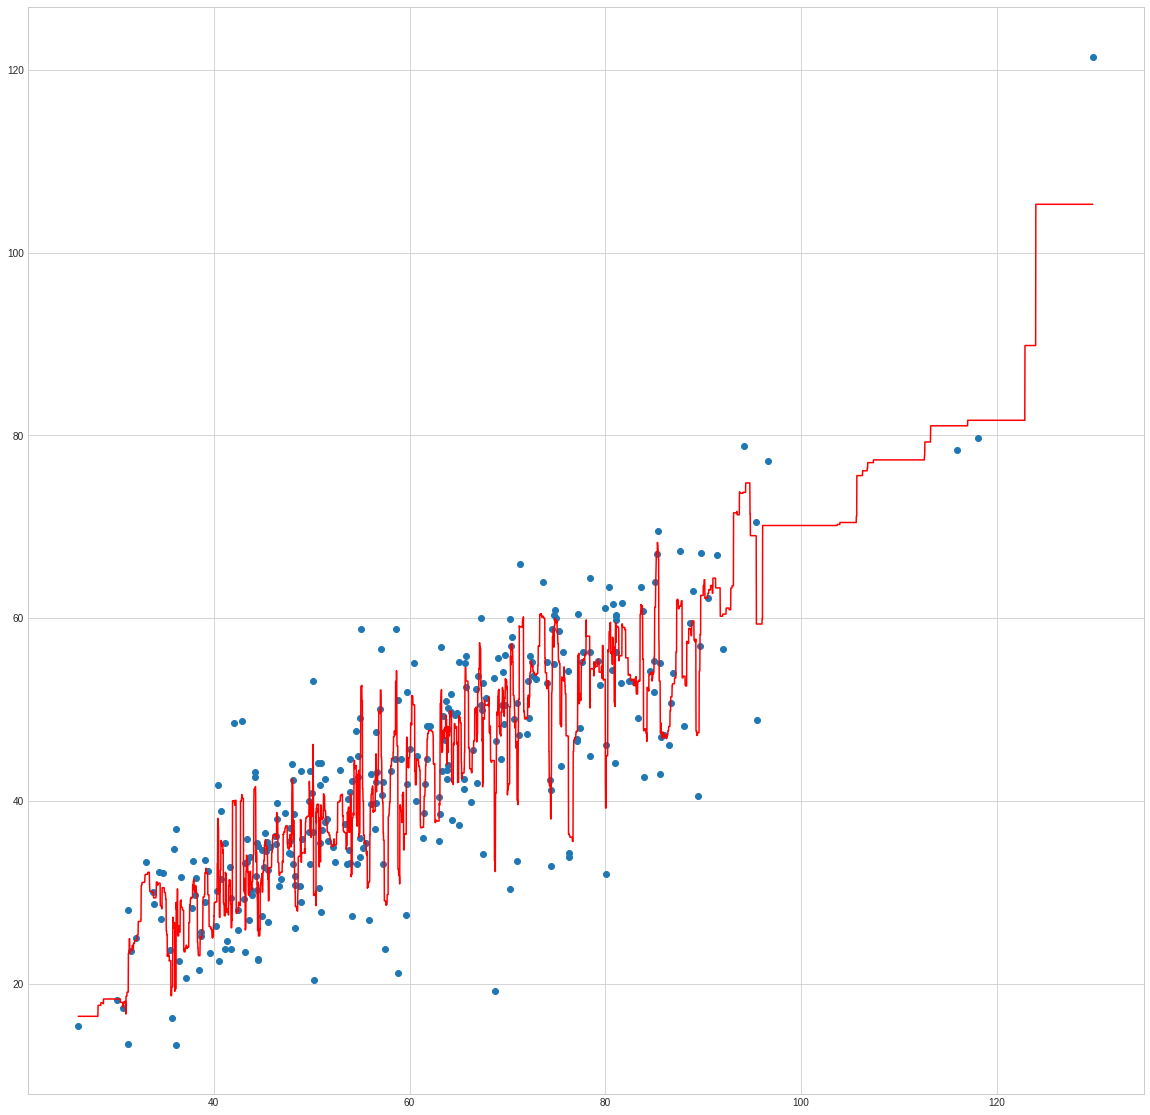

In [14]:
x=df.pelvic_incidence.values.reshape(-1,1)
y=df.sacral_slope.values.reshape(-1,1)
plt.figure(figsize=[20,20])
plt.scatter(x,y)

from sklearn.ensemble import RandomForestRegressor

random_reg=RandomForestRegressor(n_estimators=100,random_state=42)

random_reg.fit(x,y)

x_=np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head=random_reg.predict(x_)
plt.plot(x_,y_head,color="red")
plt.show()